# 银行客户认购产品预测

## 目标

预测银行客户是否会购买银行产品。通过预测分析，银行可以更精确地定位潜在的购买者，从而提高营销活动的效率和效果；可以帮助银行了解客户的个性化需求，提供更加定制化的产品和服务，增强客户满意度；可以根据客户的购买倾向来优化产品设计，更好地满足市场需求；可以更好地管理客户关系，提高客户忠诚度和留存率。

## 简介

预测客户购买银行产品对于银行的商业决策、客户关系管理和长期战略规划都具有重要的意义。数据取于阿里云天池，共30000条，其中22500条为训练集，7500条为测试集。

数据信息如下：
| Field               | Description                                                  |
|---------------------|--------------------------------------------------------------|
| age                 | 年龄                                                         |
| job                 | 职业：admin, unknown, unemployed, management...               |
| marital             | 婚姻：married, divorced, single                              |
| default             | 信用卡是否有违约：yes, no                                    |
| housing             | 是否有房贷：yes, no                                          |
| contact             | 联系方式：unknown, telephone, cellular                        |
| month               | 上一次联系的月份：jan, feb, mar, ...                          |
| day_of_week         | 上一次联系的星期几：mon, tue, wed, thu, fri                   |
| duration            | 上一次联系的时长（秒）                                       |
| campaign            | 活动期间联系客户的次数                                       |
| pdays               | 上一次与客户联系后的间隔天数                                   |
| previous            | 在本次营销活动前，与客户联系的次数                             |
| poutcome            | 之前营销活动的结果：unknown, other, failure, success         |
| emp_var_rate        | 就业变动率（季度指标）                                       |
| cons_price_index    | 消费者价格指数（月度指标）                                   |
| cons_conf_index     | 消费者信心指数（月度指标）                                   |
| lending_rate3m      | 银行同业拆借率 3个月利率（每日指标）                         |
| nr_employed         | 雇员人数（季度指标）                                         |
| subscribe           | 客户是否进行购买：yes, no                                    |


# 加载数据集

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# 数据加载
train = pd.read_csv('./train.csv')
train

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,22496,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22496,22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22497,22498,25,admin.,married,professional.course,no,yes,no,cellular,may,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no
22498,22499,57,retired,married,high.school,no,yes,no,telephone,may,...,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43,no


In [3]:
test = pd.read_csv('./test.csv')
test

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [4]:
# 训练集、测试集合并
df =pd.concat([train, test], axis=0)
df

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64,NaN
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70,NaN
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80,NaN
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45,NaN


# 特征工程

## 特征编码

合并训练集和测试集后，总共3万个数据，当中存在不少类别特征，需要筛选并进行编码。

In [5]:
# 将所有数据类型为object的列存储在列表里
cat_columns = df.select_dtypes(include='O').columns
df[cat_columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribe
0,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,failure,no
1,services,married,high.school,unknown,yes,no,cellular,may,mon,nonexistent,yes
2,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,failure,no
3,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,nonexistent,yes
4,admin.,single,university.degree,no,no,no,cellular,nov,tue,success,no
...,...,...,...,...,...,...,...,...,...,...,...
7495,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,fri,failure,NaN
7496,blue-collar,married,basic.4y,no,no,no,cellular,jul,wed,failure,NaN
7497,retired,single,basic.4y,no,yes,no,cellular,jun,mon,nonexistent,NaN
7498,technician,married,professional.course,no,no,no,cellular,aug,thu,nonexistent,NaN


In [6]:
from sklearn.preprocessing import LabelEncoder
# 对类别特征进行编码
# job	marital	  education    
job_le = LabelEncoder()
df['job'] = job_le.fit_transform(df['job'])
df['job'].value_counts()

job
0     7383
1     6506
9     4731
7     2834
4     2164
5     1335
2     1158
6     1123
3      848
10     844
8      716
11     358
Name: count, dtype: int64

In [7]:
df['marital'].value_counts()
df['marital'] = df['marital'].map({'unknown': 0, 'single': 1, 'married': 2, 'divorced': 3})
df['marital'].value_counts()

marital
2    17604
1     8417
3     3528
0      451
Name: count, dtype: int64

In [8]:
df['education'].value_counts()

education
university.degree      8709
high.school            6774
basic.9y               4320
professional.course    3786
basic.4y               3071
basic.6y               1794
unknown                1330
illiterate              216
Name: count, dtype: int64

In [9]:
df['education'].value_counts()
df['education'] = df['education'].map({'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3,\
                    'basic.9y': 4, 'high.school': 5, 'university.degree': 6, 'professional.course': 7})
df['education'].value_counts()

education
6    8709
5    6774
4    4320
7    3786
2    3071
3    1794
0    1330
1     216
Name: count, dtype: int64

In [10]:
# housing	loan	contact	month	day_of_week	poutcome
df['housing'].value_counts()
df['housing'] = df['housing'].map({'unknown': 0, 'no': 1, 'yes': 2})
df['housing'].value_counts()

housing
2    15449
1    13365
0     1186
Name: count, dtype: int64

In [11]:
df['loan'] = df['loan'].map({'unknown': 0, 'no': 1, 'yes': 2})
df['loan'].value_counts()

loan
1    23988
2     4817
0     1195
Name: count, dtype: int64

In [12]:
df['contact'] = df['contact'].map({'cellular': 0, 'telephone': 1})
df['contact'].value_counts()

contact
0    18876
1    11124
Name: count, dtype: int64

In [13]:
# mon: 0, tue: 1, wed: 2, thu: 3, fri: 4
df['day_of_week'].value_counts()
df['day_of_week'] = df['day_of_week'].map({'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4})
df['day_of_week'].value_counts()

day_of_week
3    6315
0    6133
2    5983
1    5891
4    5678
Name: count, dtype: int64

In [14]:
df['poutcome'] = df['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
df['poutcome'].value_counts()

poutcome
0    19467
1     5924
2     4609
Name: count, dtype: int64

In [15]:
df['default'].value_counts()
df['default'] = df['default'].map({'unknown': 0, 'no': 1, 'yes': 2})
df['default'].value_counts()

default
1    23015
0     6457
2      528
Name: count, dtype: int64

In [16]:
df['month'] = df['month'].map({'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, \
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['month'].value_counts()

month
5     9648
7     5060
8     4449
6     3857
11    2998
4     2005
10     641
3      545
9      528
12     269
Name: count, dtype: int64

In [17]:
df[cat_columns]
df['subscribe'] = df['subscribe'].map({'no': 0, 'yes': 1})
df['subscribe'].value_counts()

subscribe
0.0    19548
1.0     2952
Name: count, dtype: int64

In [18]:
# 查看训练集的目标值有无缺漏，如果无缺，后续训练模型可以据此切分数据集
missing_values_count = train['subscribe'].isnull().sum()
print(f"缺失值的数量: {missing_values_count}")

缺失值的数量: 0


## 数据清洗

In [19]:
# 缺失值处理
print(df.isnull().sum())

id                     0
age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp_var_rate           0
cons_price_index       0
cons_conf_index        0
lending_rate3m         0
nr_employed            0
subscribe           7500
dtype: int64


训练集没有存在缺失值，测试集的subscribe是需要预测，提交天池比赛页面进行评估比对的，不用处理

In [20]:
# 检测重复值  
duplicates = df.duplicated()  
duplicates 

0       False
1       False
2       False
3       False
4       False
        ...  
7495    False
7496    False
7497    False
7498    False
7499    False
Length: 30000, dtype: bool

In [21]:
# 异常值
#异常数据应该主要来源于年龄异常:根据常规,贷款人的年龄一般不超过70岁,如果数据中有超过70岁的贷款人，该行数据可能异常。另外,老龄客户精力有限,如果80岁以上的老龄客户联系时长过长，也可能是异常数据

# 检测年龄超过70岁的贷款人，并且有房贷
age_outliers = df[(df['age'] > 70) & (df['housing'] == 2)]

# 检测80岁以上的老龄客户，且联系时长超过1小时（假设时长单位为分钟）
old_age_with_long_duration = df[(df['age'] > 80) & (df['duration'] > 3600)]

# 合并两种异常数据
outliers = pd.concat([age_outliers, old_age_with_long_duration], axis=0).drop_duplicates()

# 打印异常数据
print("异常数据：")
print(outliers)

异常数据：
          id  age  job  marital  education  default  housing  loan  contact  \
22        23   72    5        2          4        1        2     1        0   
30        31   98    1        2          4        1        2     2        0   
67        68   72    8        1          5        1        2     0        0   
299      300   85    5        2          6        1        2     2        0   
453      454   74    5        2          6        1        2     1        0   
...      ...  ...  ...      ...        ...      ...      ...   ...      ...   
19156  19157   95   10        3          2        0        1     0        0   
20328  20329   94    7        0          5        0        0     2        0   
4013   26514   85    4        2          1        1        0     0        0   
5437   27938   81    5        2          2        1        1     1        0   
6963   29464   90    3        2          7        0        1     2        1   

       month  ...  campaign  pdays  previous 

当然，由于数据来源未知，有可能是国外的数据，因为相关合规政策不一样而造成的“异常数据”，在此只是从业务角度分析。另外结果提交示例中要求给满30000个样本的测试结果。所以在此暂不对异常值删减。

特征构造
有day_of_week一列，如果有包含周末,可以单独构造新特征，因为周末可能有不同的响应率
如果有具体到天的日期，可以提取出是否为月末最后一周，因为月末的响应率一般会和其他时间段不同
但该数据集里的信息没有包含上述，这条cell只作为业务理解

# 模型训练

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
# 切分数据集
train = df[df['subscribe'].notnull()]
test = df[df['subscribe'].isnull()]

In [24]:
# 划分特征和目标变量
X = train.drop(['id', 'subscribe'], axis=1)
y = train['subscribe']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LightGBM模型

In [25]:
import lightgbm as lgb
# 创建 LightGBM 数据集
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#设置参数
params = {"num_leaves":60,
          "objective":"binary",
          "boosting":"gbdt",
          "metric":{"binary_logloss", "auc"}
          }

#定义训练的过程
# 训练模型，使用 callbacks 参数
clf = lgb.train(params, lgb_train, num_boost_round=200, valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(60, verbose=True)])

[LightGBM] [Info] Number of positive: 2356, number of negative: 15644
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1737
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130889 -> initscore=-1.893122
[LightGBM] [Info] Start training from score -1.893122
Training until validation scores don't improve for 60 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.892857	valid_0's binary_logloss: 0.255894


In [26]:
# 进行预测
y_probs_lgb = clf.predict(X_test, num_iteration=clf.best_iteration)

#设阈值0.5，大于等于0.5会购买，小于不会购买
y_preds_lgb = [0 if each < 0.5 else 1 for each in y_probs_lgb]


## 模型评估
### 混淆矩阵
### 准确率、召回率、精确率、f1

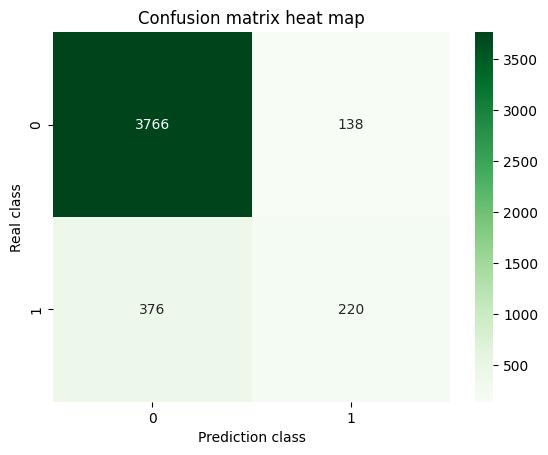

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_preds_lgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')

plt.xlabel('Prediction class')
plt.ylabel('Real class')
plt.title('Confusion matrix heat map')
plt.show()

In [28]:
from sklearn.metrics import  accuracy_score, f1_score, classification_report
# 计算准确率和F1分数
accuracy = accuracy_score(y_test, y_preds_lgb)
f1 = f1_score(y_test, y_preds_lgb, average='weighted')
print("准确率:", accuracy)
print("F1分数:", f1)

# 输出分类报告
class_report = classification_report(y_test, y_preds_lgb)
print("分类报告:")
print(class_report)

准确率: 0.8857777777777778
F1分数: 0.8732192742881472
分类报告:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      3904
         1.0       0.61      0.37      0.46       596

    accuracy                           0.89      4500
   macro avg       0.76      0.67      0.70      4500
weighted avg       0.87      0.89      0.87      4500



# 模型预测

In [29]:
# 划分特征和目标变量
X_new = test.drop(['id', 'subscribe'], axis=1)

# 使用模型进行预测，获取购买概率
y_probs_test_lgb = clf.predict(X_new, num_iteration=clf.best_iteration)

# 将概率转换为类别标签（设概率大于等于 0.5 则预测为 'yes'，否则为 'no'）
y_pred_test_lgb = ['yes' if prob >= 0.5 else 'no' for prob in y_probs_test_lgb]

In [30]:
# 将预测结果与 'id' 列合并，并输出
predictions = pd.DataFrame({
    'id': test['id'],
    'predicted_subscribe': y_pred_test_lgb
})

# 打印结果
print(predictions)

# 将结果保存到 CSV 文件
predictions.to_csv('predictions.csv', index=False)

         id predicted_subscribe
0     22501                  no
1     22502                  no
2     22503                  no
3     22504                  no
4     22505                  no
...     ...                 ...
7495  29996                  no
7496  29997                  no
7497  29998                  no
7498  29999                  no
7499  30000                  no

[7500 rows x 2 columns]
